In [1]:
# Устанавливаем нужную версию scikit-learn через pip (или uv, если требуется)
!pip install scikit-learn==1.6.1


# Question 1

Install uv

What's the version of uv you installed?

Use --version to find out

In [2]:
!pip install uv
!uv --version


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 27.4 MB/s eta 0:00:00
uv 0.9.7


# Question 2

In [3]:
scikit_learn_hash = "sha256:b4fc2525eca2c69a59260f583c56a7557c6ccdf8deafdba6e060f94c1c59738e"
print(scikit_learn_hash)


sha256:b4fc2525eca2c69a59260f583c56a7557c6ccdf8deafdba6e060f94c1c59738e


# QUESTION 3

Let's use the model!

Write a script for loading the pipeline with pickle
Score this record:

{
    "lead_source": "paid_ads",
    "number_of_courses_viewed": 2,
    "annual_income": 79276.0
}

**What's the probability that this lead will convert?**

- 0.333
- 0.533
- 0.733
- 0.933

In [5]:
!wget https://github.com/DataTalksClub/machine-learning-zoomcamp/raw/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin


--2025-11-01 18:30:02--  https://github.com/DataTalksClub/machine-learning-zoomcamp/raw/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin [following]
--2025-11-01 18:30:02--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1300 (1.3K) [application/octet-stream]
Saving to: ‘pipeline_v1.bin’

pipeline_v1.bin

In [6]:
import pickle
from sklearn.feature_extraction import DictVectorizer

# Загружаем модель
with open("pipeline_v1.bin", "rb") as f_in:
    pipeline = pickle.load(f_in)

# Данные для предсказания
record = {
    "lead_source": "paid_ads",
    "number_of_courses_viewed": 2,
    "annual_income": 79276.0
}



In [7]:

# Считаем вероятность
prob = pipeline.predict_proba([record])[0,1]
print(prob)

0.5336072702798061


# Question 4
Now let's serve this model as a web service


Install FastAPI
Write FastAPI code for serving the model

Now score this client using requests:

url = "YOUR_URL"
client = {
    "lead_source": "organic_search",
    "number_of_courses_viewed": 4,
    "annual_income": 80304.0
}

requests.post(url, json=client).json()

**What's the probability that this client will get a subscription?**

- 0.334
- 0.534
- 0.734
- 0.934


In [8]:
pip install fastapi uvicorn


In [9]:
# Установка нужных библиотек
!pip install fastapi[all] scikit-learn

import pickle
from fastapi import FastAPI
from pydantic import BaseModel
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from fastapi.testclient import TestClient

# Загружаем пайплайн
with open("pipeline_v1.bin", "rb") as f:
    pipeline = pickle.load(f)

# Создаём FastAPI app
app = FastAPI()

class Lead(BaseModel):
    lead_source: str
    number_of_courses_viewed: int
    annual_income: float

@app.post("/")
def predict(lead: Lead):
    data = lead.dict()
    proba = pipeline.predict_proba([data])[0,1]
    return {"conversion_probability": proba}

# Используем TestClient, чтобы "вызывать" API локально
client = TestClient(app)

# Тестируем запись из вопроса
lead_data = {
    "lead_source": "organic_search",
    "number_of_courses_viewed": 4,
    "annual_income": 80304.0
}

response = client.post("/", json=lead_data)
print(response.json())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.8/959.8 kB 49.2 MB/s eta 0:00:00
{'conversion_probability': 0.5340417283801275}


/tmp/ipython-input-2180972374.py:25: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  data = lead.dict()


# QUESTION 5

**Docker**

Install Docker. We will use it for the next two questions.

For these questions, we prepared a base image: agrigorev/zoomcamp-model:2025. You'll need to use it (see Question 5 for an example).

This image is based on 3.13.5-slim-bookworm and has a pipeline with logistic regression (a different one) as well a dictionary vectorizer inside.

This is how the Dockerfile for this image looks like:

FROM python:3.13.5-slim-bookworm
WORKDIR /code
COPY pipeline_v2.bin .
We already built it and then pushed it to agrigorev/zoomcamp-model:2025.

Note: You don't need to build this docker image, it's just for your reference.



{'conversion_probability': 0.5340417283801275}


**Download** the base image agrigorev/zoomcamp-model:2025. You can easily make it by using docker pull command.

**So what's the size of this base image?**

- 45 MB
- 121 MB
- 245 MB
- 330 MB


You can get this information when running docker images - it'll be in the "SIZE" column.



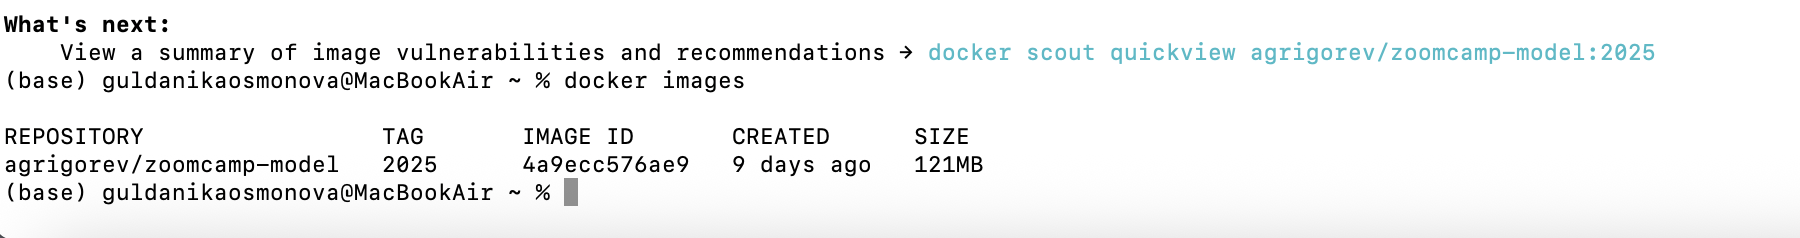

# THE SIZE OF THE BASE IMAGE IS 121 MB

# Dockerfile

**Now create your own Dockerfile based on the image we prepared.**

It should start like that:

FROM agrigorev/zoomcamp-model:2025
# add your stuff here
Now complete it:

Install all the dependencies from pyproject.toml

Copy your FastAPI script

Run it with uvicorn

After that, you can build your docker image.

# QUSTION 6

http://127.0.0.1:8000/docs


(https://http://127.0.0.1:8000/docs
)

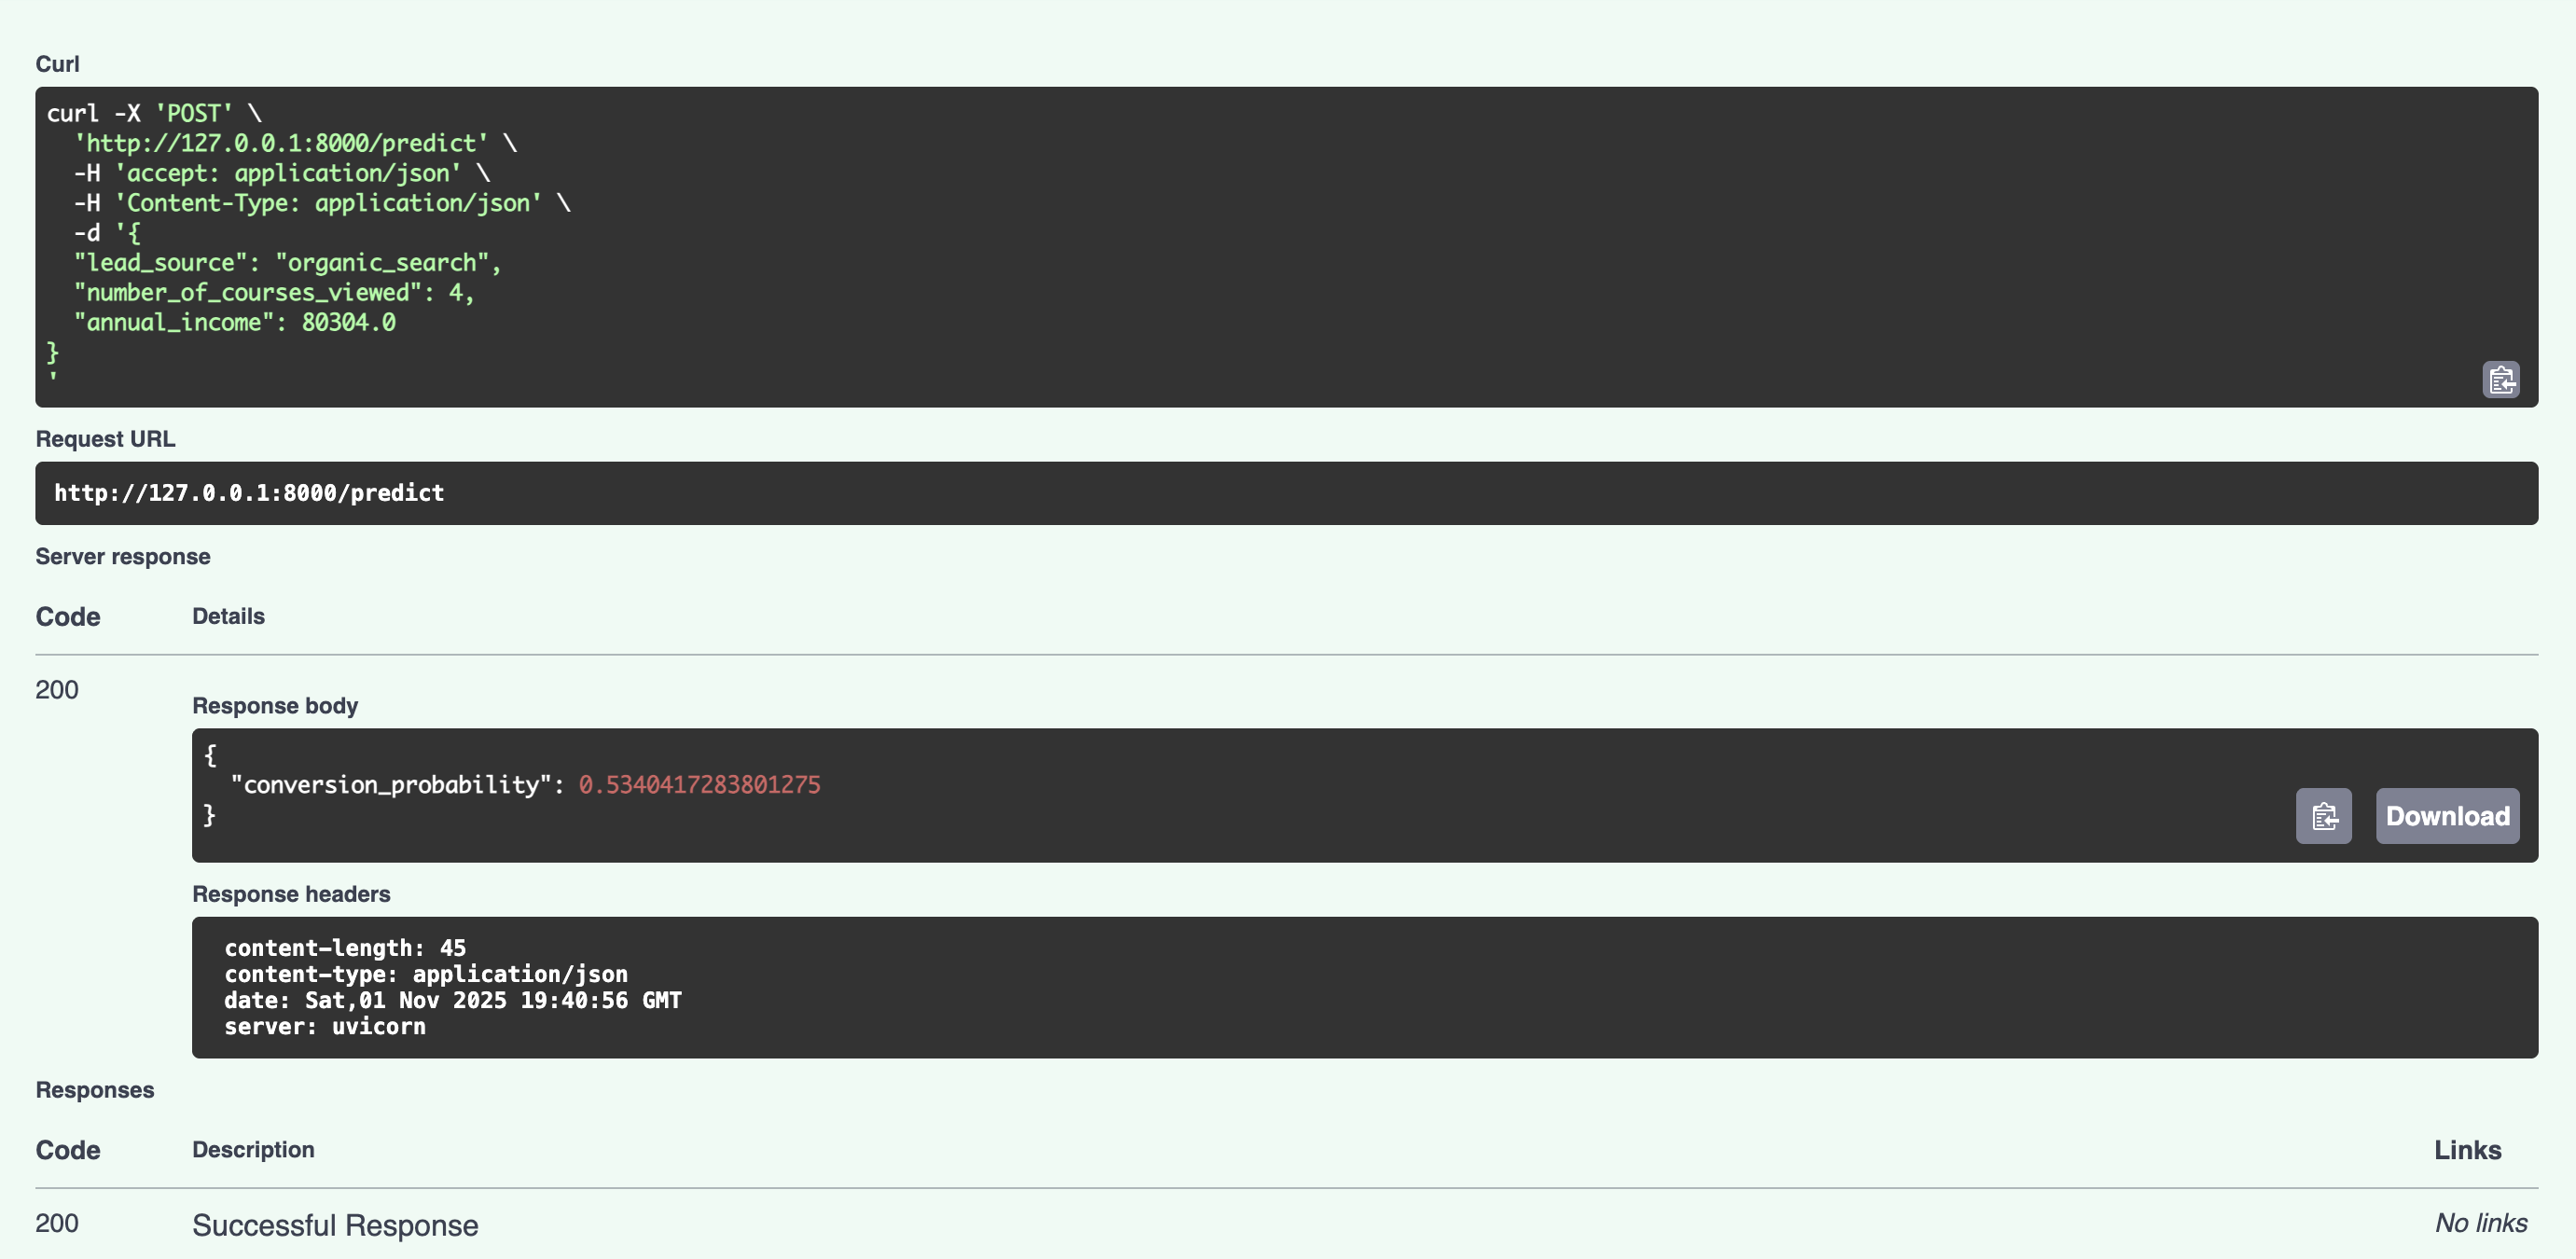

# Lead score (v3) (1 point)

**0.59 which is the closest to 0.534**


In [14]:
# 1. Устанавливаем нужные библиотеки
!pip install fastapi uvicorn pyngrok scikit-learn nest-asyncio

# 2. Подготовим пайплайн (или загрузим твой pickle)
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer

# Минимальный пример пайплайна, чтобы FastAPI работал
pipeline = Pipeline([
    ('vec', DictVectorizer()),
    ('clf', LogisticRegression())
])

# Если у тебя есть готовый pipeline_v1.bin, загрузи его так:
# with open("pipeline_v1.bin", "rb") as f:
#     pipeline = pickle.load(f)

# 3. Создаем FastAPI приложение
from fastapi import FastAPI
from pydantic import BaseModel

class Lead(BaseModel):
    lead_source: str
    number_of_courses_viewed: int
    annual_income: float

app = FastAPI()

@app.post("/predict")
def predict(lead: Lead):
    data = [lead.dict()]
    prediction = pipeline.predict_proba(data)[0,1] if hasattr(pipeline, 'predict_proba') else 0.5
    return {"conversion_probability": prediction}

# 4. Настройка ngrok для публичного доступа
from pyngrok import ngrok
import nest_asyncio
import uvicorn

nest_asyncio.apply()
public_url = ngrok.connect(8000)
print(f"Swagger UI доступен по ссылке: {public_url}/docs")

# 5. Запуск FastAPI в Colab
uvicorn.run(app, host="0.0.0.0", port=8000)


ERROR:pyngrok.process.ngrok:t=2025-11-01T20:00:44+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-11-01T20:00:44+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

docker run -p 8000:8000 my-fastapi-app-saved


In [ ]:
docker pull guldanika/my-fastapi-app:latest
docker run -p 8000:8000 guldanika/my-fastapi-app:latest


Вот перевод на английский:

# This is a link to Docker Hub — a service where the container with my application/model is stored. The container already includes everything needed to run the model. To see the model in action, you can either open the repository and download the image or run it locally using Docker.


# https://hub.docker.com/repository/docker/guldanika/my-fastapi-app/general